Field name 	Description 
ID 	Clump thickness
Clump 	Clump thickness
UnifSize 	Uniformity of cell size
UnifShape 	Uniformity of cell shape
MargAdh 	Marginal adhesion
SingEpiSize 	Single epithelial cell size
BareNuc 	Bare nuclei
BlandChrom 	Bland chromatin
NormNucl 	Normal nucleoli
Mit 	Mitoses
Class 	Benign or malignant

The class values are graded from 1 to 10, with 1 being the closest to benign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/masterArnob/IBM-Machine-Learning-with-Python/refs/heads/main/SVM/cell_samples.csv"
df = pd.read_csv(url)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class            int64
dtype: object

In [8]:
df.isnull().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [11]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [14]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'clump', 'unifsize', 'unifshape', 'margadh', 'singepisize',
       'barenuc', 'blandchrom', 'normnucl', 'mit', 'class'],
      dtype='object')

In [17]:
df["class"].value_counts()

class
2    444
4    239
Name: count, dtype: int64

In [18]:
df.corr()

,id,clump,unifsize,unifshape,margadh,singepisize,barenuc,blandchrom,normnucl,mit,class
id,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
clump,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
unifsize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
unifshape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
margadh,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
singepisize,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
barenuc,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
blandchrom,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normnucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mit,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [20]:
X = df.drop("class", axis=1)
y = df["class"]
X

,id,clump,unifsize,unifshape,margadh,singepisize,barenuc,blandchrom,normnucl,mit
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1
695,841769,2,1,1,1,2,1.0,1,1,1
696,888820,5,10,10,3,7,3.0,8,10,2
697,897471,4,8,6,4,3,4.0,10,6,1


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.12366418,  0.19790469, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [-0.30297227,  0.19790469,  2.23617957, ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.2890233 , -0.15686934,  1.58320366, ...,  2.67776377,
         0.37054027, -0.34839971]], shape=(683, 10))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
y_pred = model.predict(X_test)
y_pred

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2])

Accuracy: 95.62043795620438%

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        79
           4       0.95      0.95      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137




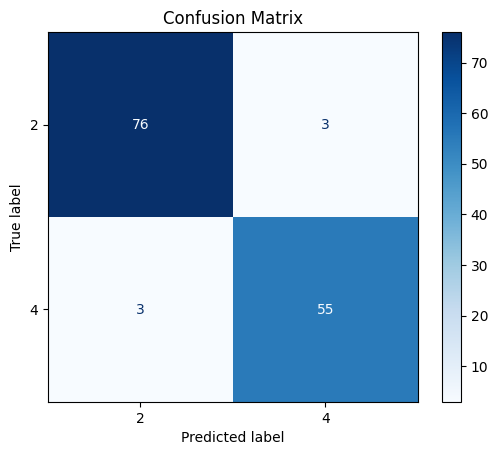

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}%\n")
print(f"Classification Report:\n{c_report}\n")
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["2", "4"])
display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

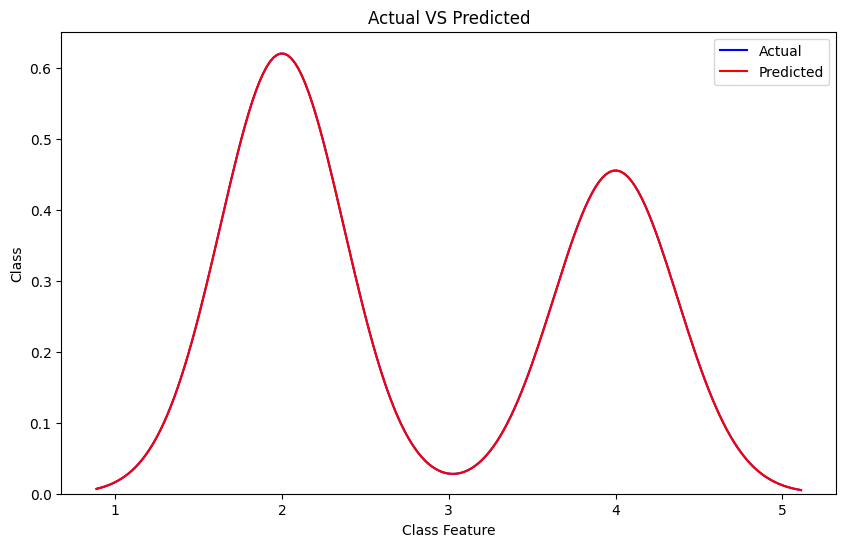

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(y_test, color="blue", label="Actual", fill=False)
sns.kdeplot(y_pred, color="red", label="Predicted", fill=False)
plt.title("Actual VS Predicted")
plt.xlabel("Class Feature")
plt.ylabel("Class")
plt.legend()
plt.show()